In [262]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import re
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Dataset

### 1.1 Input Dataset

https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

In [263]:
# Setting the root directory path for the dataset
root = '/content/drive/MyDrive/project/housing price/dataset/'

In [318]:
df = pd.read_csv(root + 'Housing.csv')

### 1.2 Table Setting

In [319]:
# Setting the maximum number of columns to display as None (unlimited)
pd.set_option('display.max_columns', None)

# Setting the maximum number of rows to display as None (unlimited)
#pd.set_option('display.max_rows', None)

### 1.3 Dataset Summary

In [320]:
print('Dataframe Housing:', df.shape[0], "rows and", df.shape[1], 'columns')

Dataframe Housing: 545 rows and 13 columns


## 2. Data Understanding

### 2.1 Data Checking




In [321]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [323]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [324]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [325]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [326]:
print(df['price'].max())

13300000


In [327]:
a_max = df[df['area']==16200]

In [328]:
a_max

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [329]:
p_max = df[df['price']==13300000]

In [330]:
p_max

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [331]:
print(df['price'].min())

1750000


In [332]:
p_min = df[df['price']==1750000]

In [333]:
p_min

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [334]:
print(df['price'].mean())

4766729.247706422


### 2.2 Exploratory Data Analysis

In [335]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


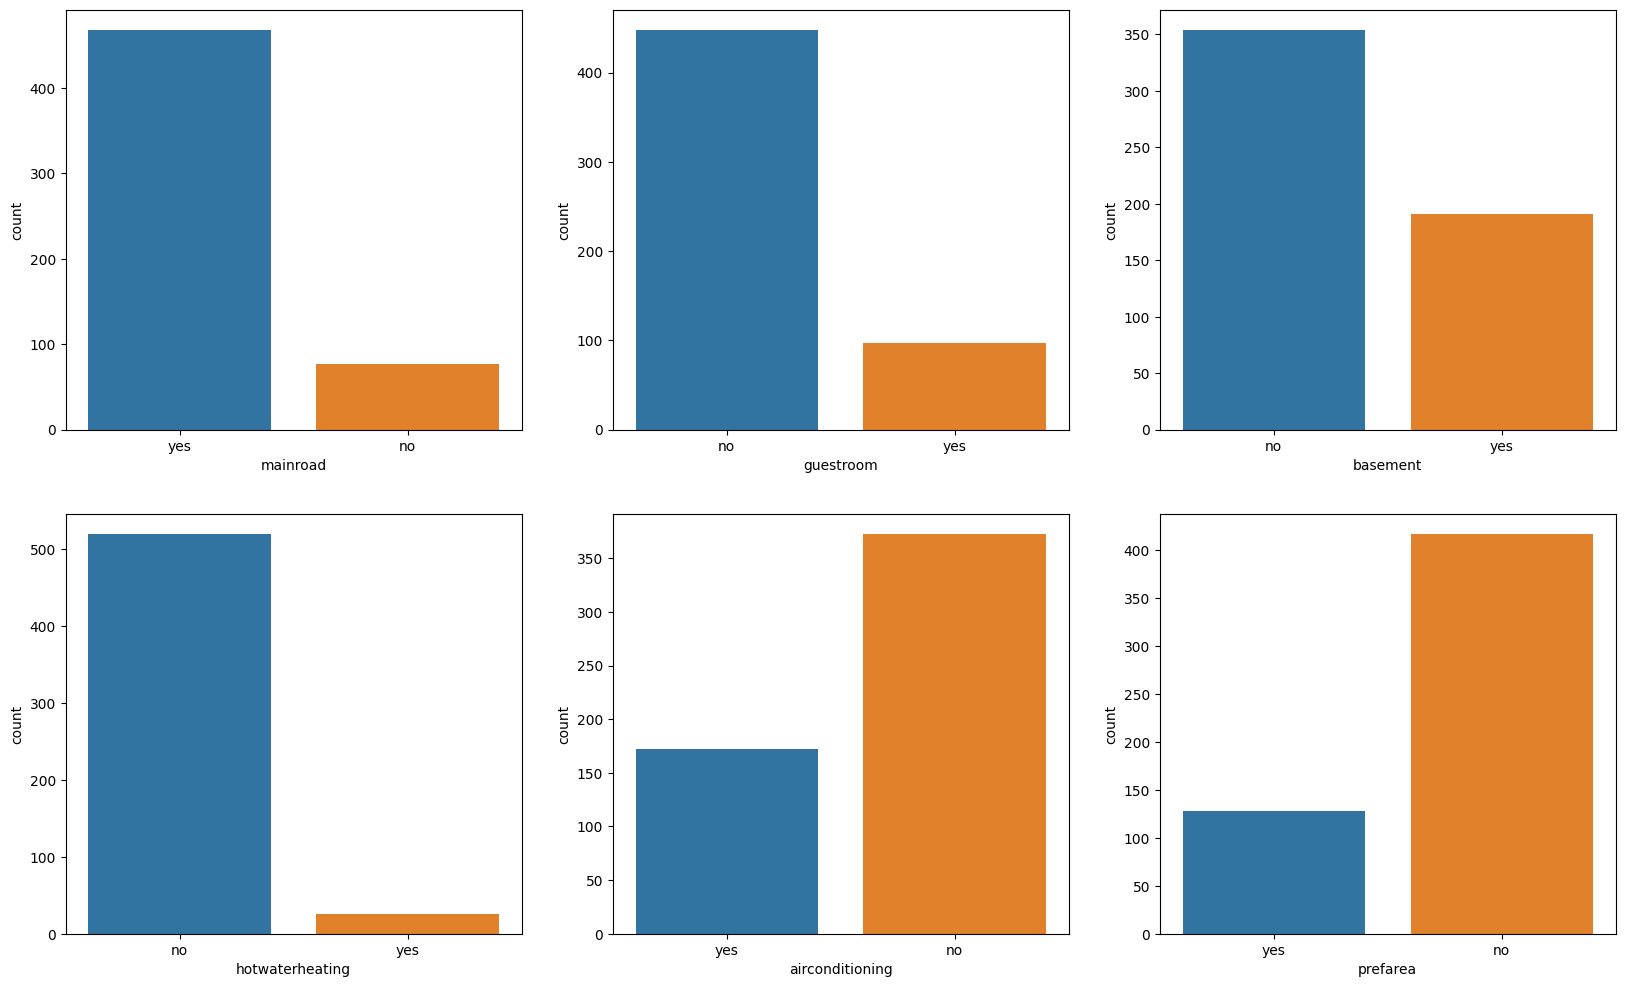

In [336]:
# Exploring numerical data
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='mainroad',data=df)
    sns.countplot(ax = axes[0,1], x='guestroom',data=df)
    sns.countplot(ax = axes[0,2], x='basement',data=df)
    sns.countplot(ax = axes[1,0], x='hotwaterheating',data=df)
    sns.countplot(ax = axes[1,1], x='airconditioning',data=df)
    sns.countplot(ax = axes[1,2], x='prefarea',data=df)
plot_categorical_data()

In [337]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


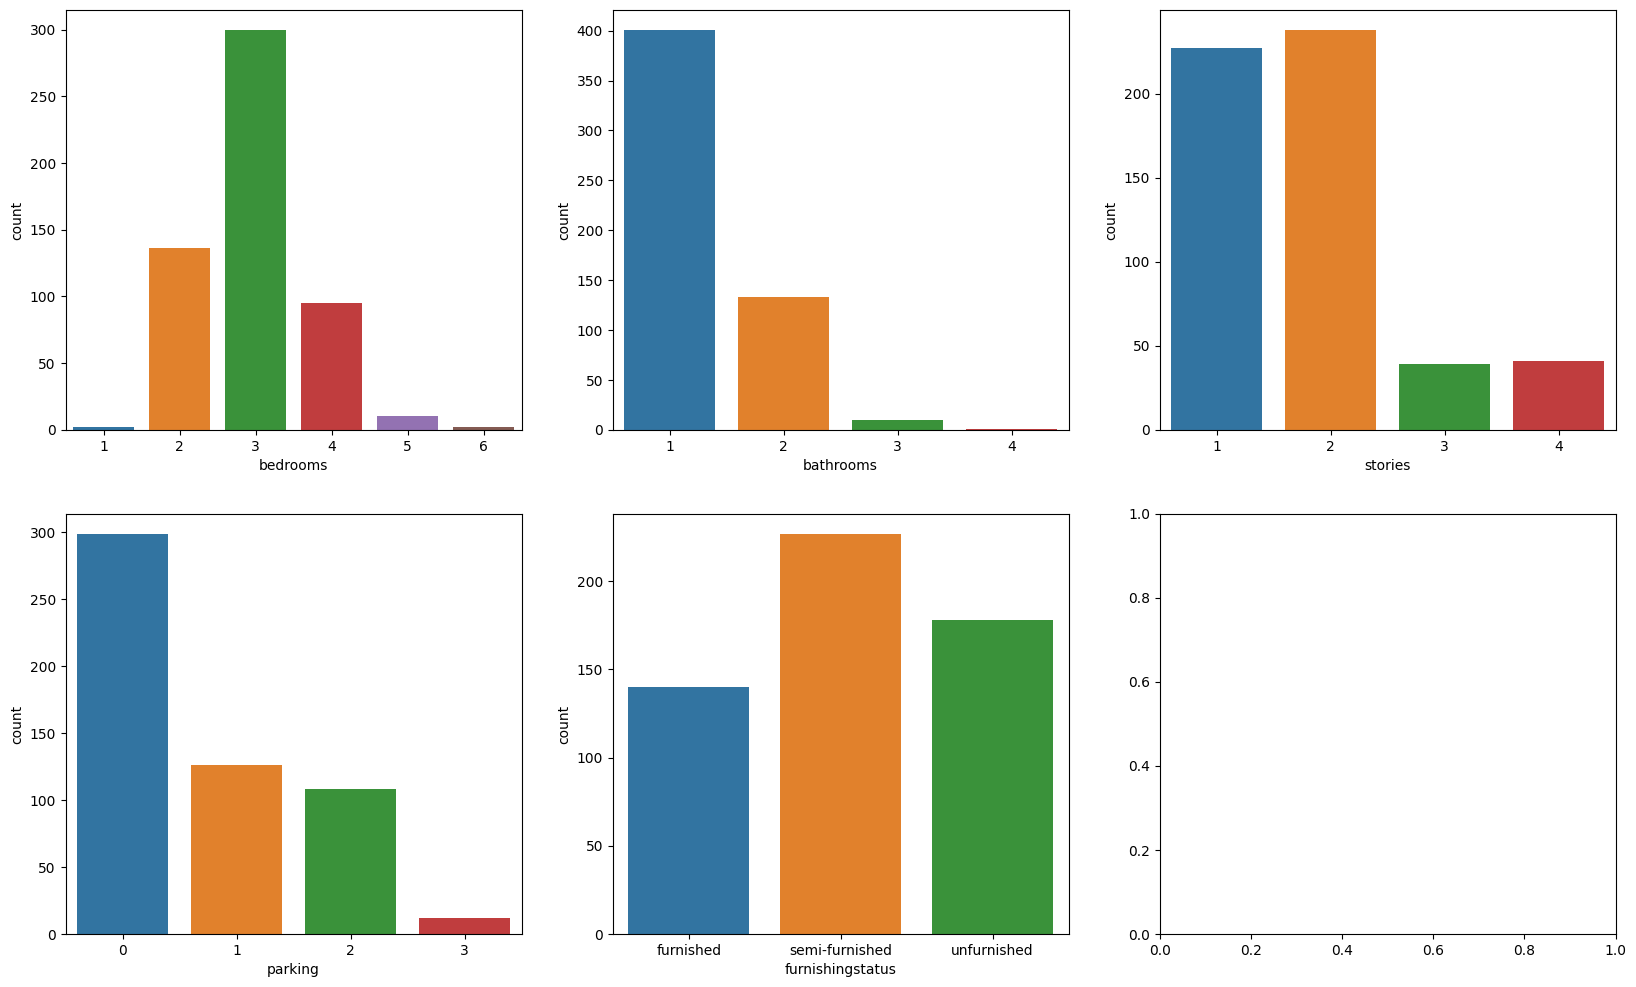

In [338]:
def plot_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.countplot(ax = axes[0,0], x='bedrooms',data=df)
    sns.countplot(ax = axes[0,1], x='bathrooms',data=df)
    sns.countplot(ax = axes[0,2], x='stories',data=df)
    sns.countplot(ax = axes[1,0], x='parking',data=df)
    sns.countplot(ax = axes[1,1], x='furnishingstatus',data=df)
plot_data()

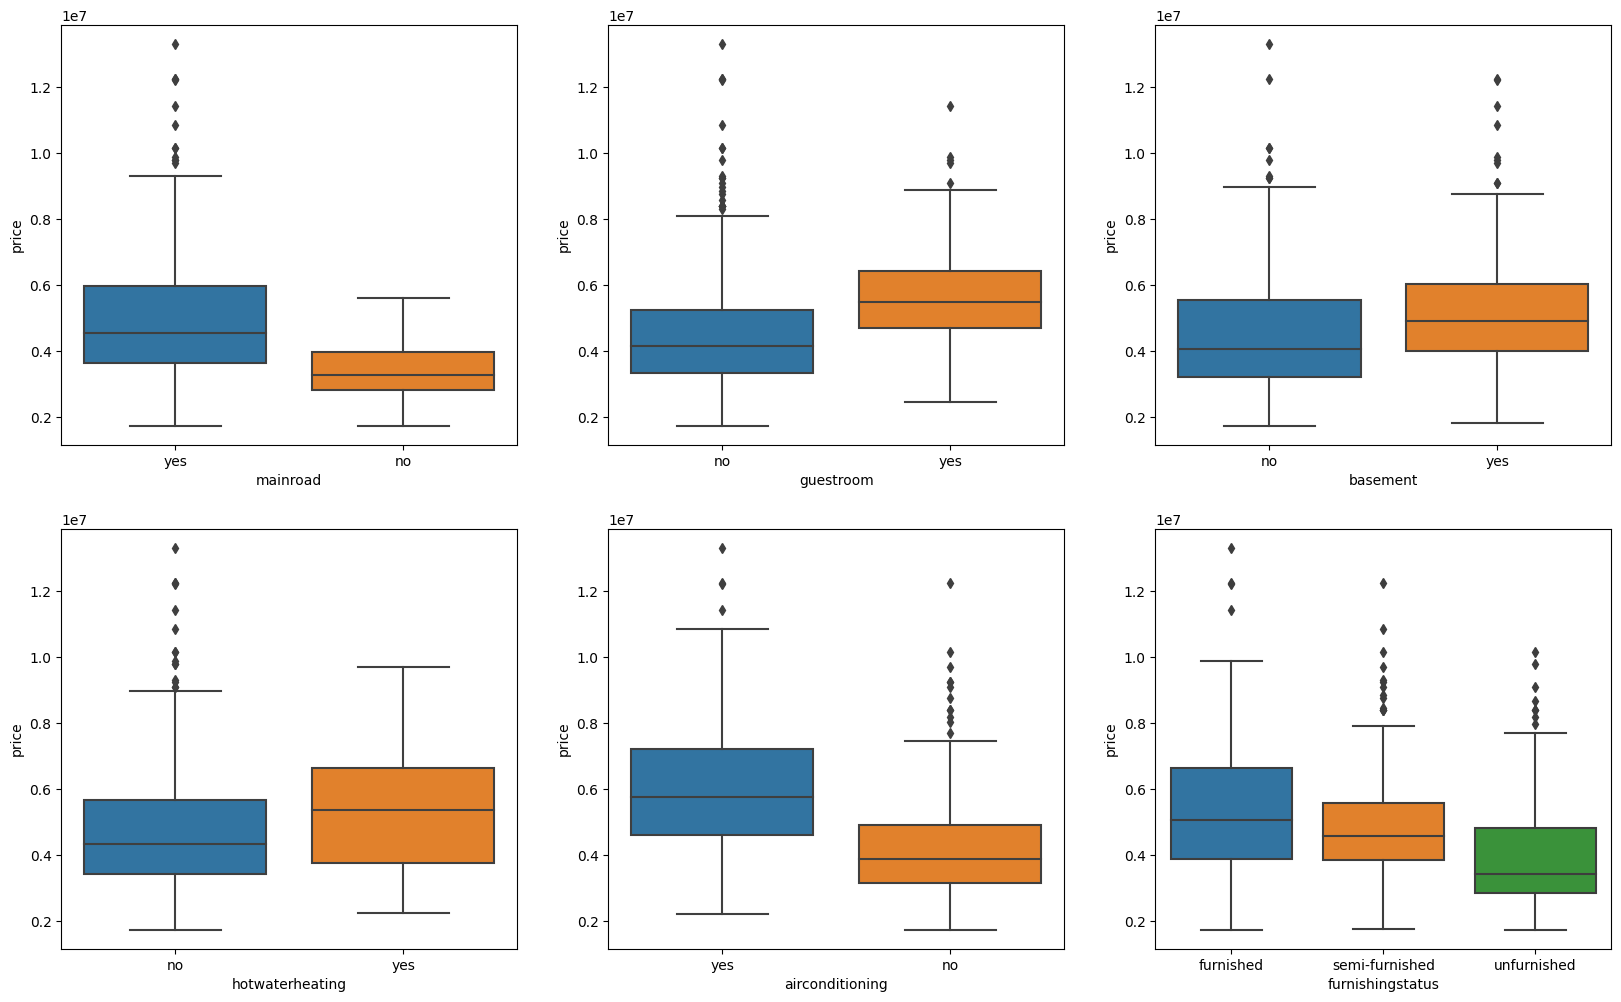

In [339]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

<Axes: xlabel='price', ylabel='area'>

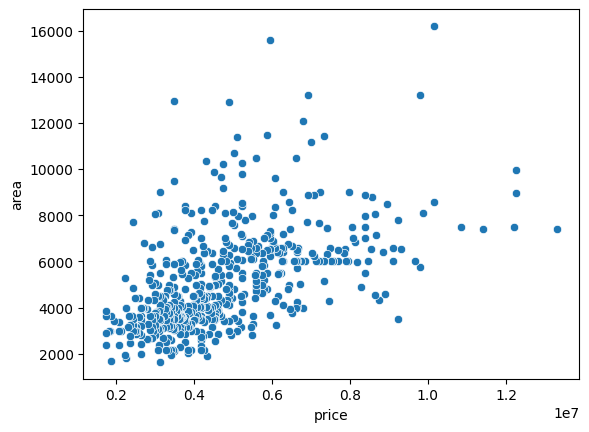

In [340]:
sns.scatterplot(x='price', y='area', data=df)


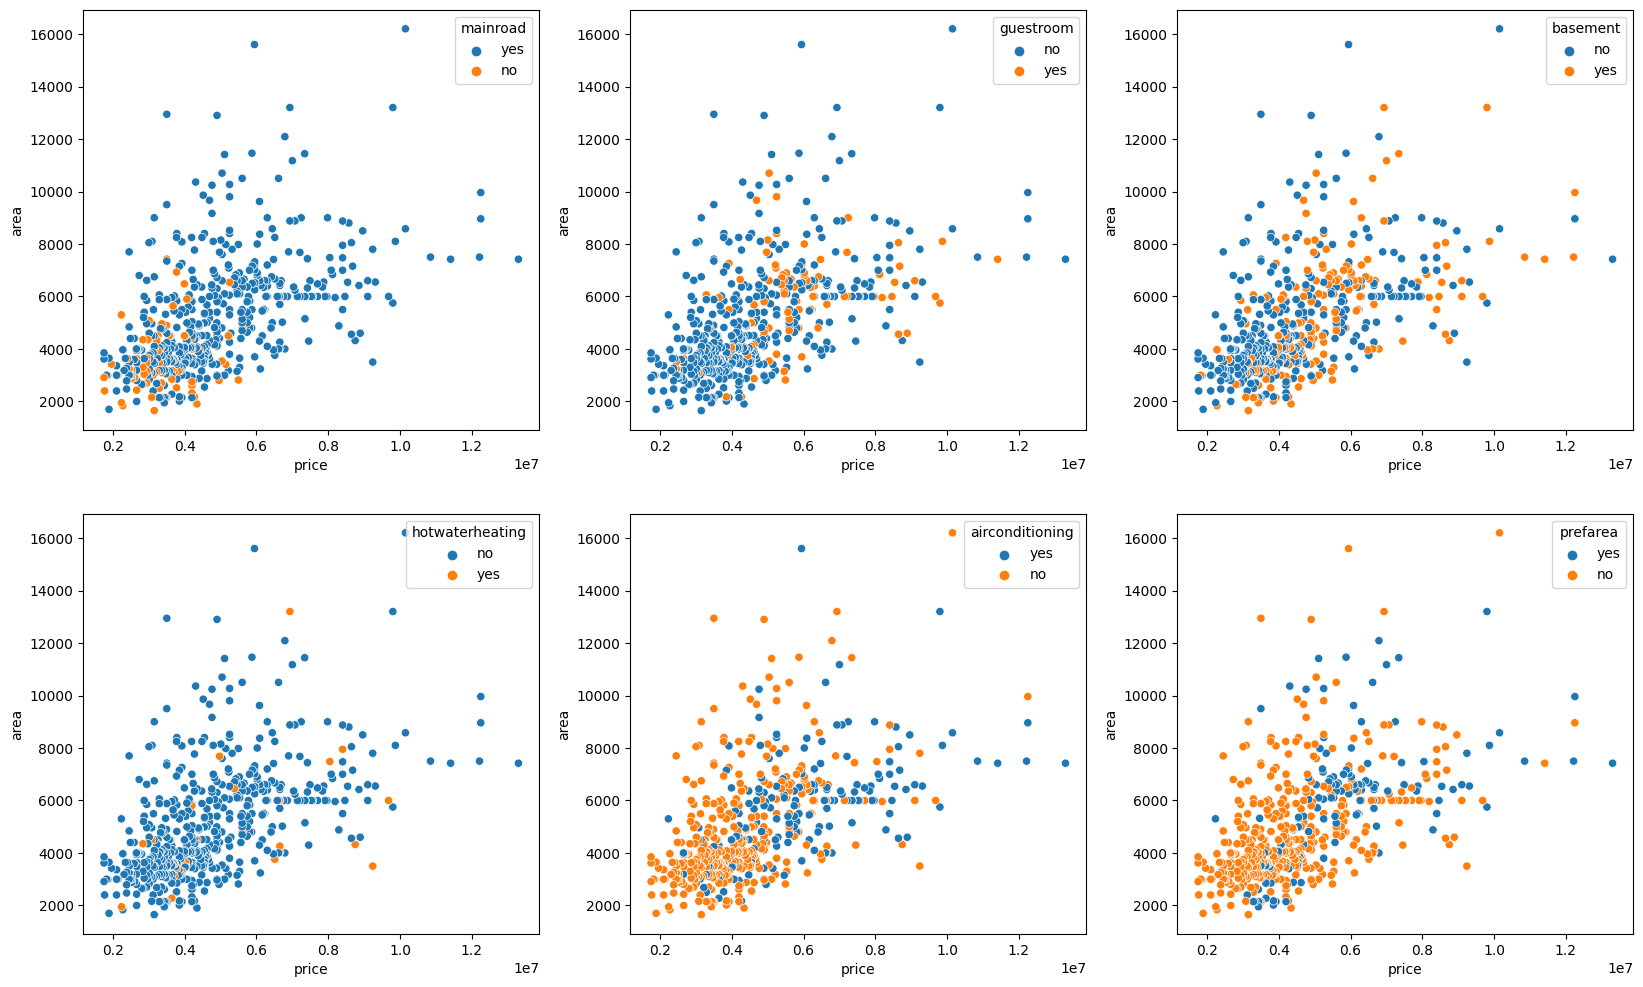

In [341]:
# Exploring numerical data
def plot_categorical_data():
    fig,axes =plt.subplots(2,3,figsize = (20,12))

    sns.scatterplot(ax = axes[0,0], x='price', y='area',hue='mainroad',data=df)
    sns.scatterplot(ax = axes[0,1], x='price', y='area',hue='guestroom',data=df)
    sns.scatterplot(ax = axes[0,2], x='price', y='area',hue='basement',data=df)
    sns.scatterplot(ax = axes[1,0], x='price', y='area',hue='hotwaterheating',data=df)
    sns.scatterplot(ax = axes[1,1], x='price', y='area',hue='airconditioning',data=df)
    sns.scatterplot(ax = axes[1,2], x='price', y='area',hue='prefarea',data=df)
plot_categorical_data()

## 3. Data Preprocessing


### 3.1 One Hot Encoding

In [342]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [343]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [344]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['mainroad']= label_encoder.fit_transform(df['mainroad'])
df['guestroom']= label_encoder.fit_transform(df['guestroom'])
df['basement']= label_encoder.fit_transform(df['basement'])
df['hotwaterheating']= label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']= label_encoder.fit_transform(df['airconditioning'])
df['prefarea']= label_encoder.fit_transform(df['prefarea'])

In [345]:
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [346]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0


In [347]:
df.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

### 3.2 Feature Selection

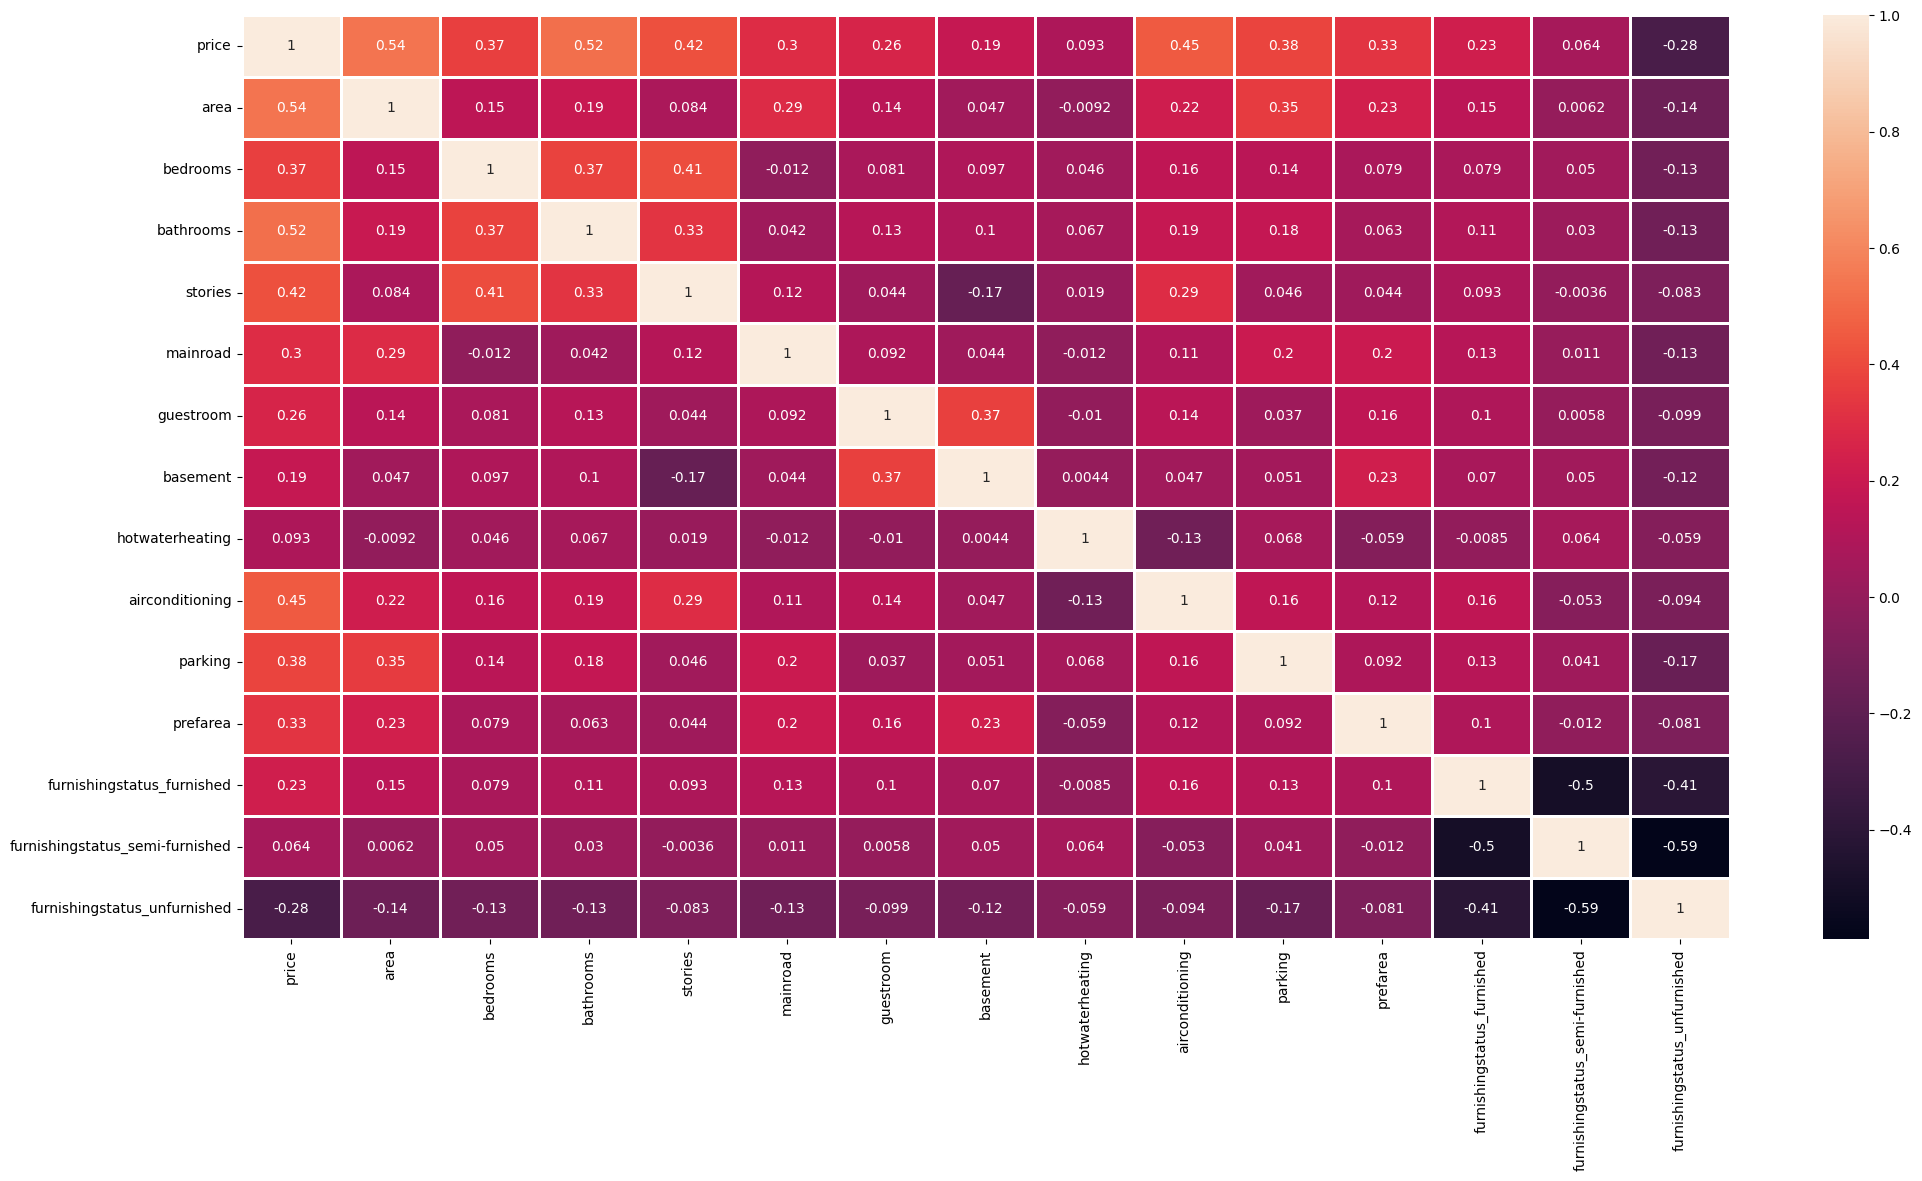

In [348]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [349]:
X = df.loc[:, df.columns != 'price']
y = df['price']

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

## 4. Modeling


### 4.1 linear regression

In [351]:
from sklearn import linear_model, metrics

In [352]:
 # create linear regression object
reg = linear_model.LinearRegression()

In [353]:
reg.fit(X_train, y_train)

LinearRegression()

### 4.2  lasso


In [354]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

# Melatih model
lasso.fit(X_train, y_train)



Lasso(alpha=0.1)

### 4.3 ridge

In [355]:
from sklearn.linear_model import Ridge

# Membuat objek model regresi Ridge
ridge = Ridge(alpha=0.5)

# Melatih model
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

### 4.4 random forest

In [356]:
from sklearn.ensemble import RandomForestRegressor

# Membuat objek model Random Forest Regressor
rfg = RandomForestRegressor(n_estimators=100)

# Melatih model
rfg.fit(X_train, y_train)

RandomForestRegressor()


### 4.5 GradientBoostingRegressor





In [357]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat objek model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300)

# Melatih model
gbr.fit(X_train, y_train)

#

GradientBoostingRegressor(n_estimators=300)

### 4.6 Support Vector Reg

In [358]:
from sklearn.svm import SVR

# Membuat objek model Support Vector Regressor
model = SVR(kernel='linear')

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi


SVR(kernel='linear')

In [359]:
y_got=model.predict(X_test)

print(f"Test score :{mean_squared_error(y_got,y_test)}")
print(f"Test score :{mean_absolute_error(y_got,y_test)}")
mse = mean_squared_error(y_got,y_test)
print(f"Test score :{np.sqrt(mse)}")

print(f"Test score :{r2_score(y_got,y_test)}")

Test score :2035417332671.0952
Test score :1010175.2150364039
Test score :1426680.5292955725
Test score :-0.5340520955107728


## 5. Evaluation

In [360]:
y_pred = reg.predict(X_test)
lasso = lasso.predict(X_test)
ridge = ridge.predict(X_test)
rfg = rfg.predict(X_test)
gbr = gbr.predict(X_test)
svr = model.predict(X_test)

In [361]:
from sklearn.metrics import mean_absolute_error
print("--------------Linear Regression---------------")
mean_absolute_error(y_test, y_pred)





--------------Linear Regression---------------


716231.1189748811

In [362]:
print("--------------lasso Regression---------------")
mean_absolute_error(y_test, lasso)

--------------lasso Regression---------------


716230.8548849239

In [363]:
print("--------------ridge Regression---------------")
mean_absolute_error(y_test, ridge)

--------------ridge Regression---------------


713639.3770289097

In [364]:
print("--------------rfg Regression---------------")
mean_absolute_error(y_test, rfg)

--------------rfg Regression---------------


794175.3284403669

In [365]:
print("--------------gbr Regression---------------")
mean_absolute_error(y_test, gbr)

--------------gbr Regression---------------


834332.7686007993

In [366]:
print("--------------svr Regression---------------")
mean_absolute_error(y_test, svr)

--------------svr Regression---------------


1010175.2150364039

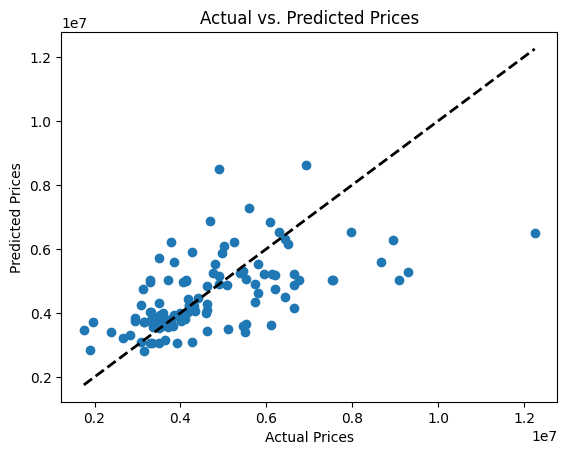

In [367]:
plt.scatter(y_test, svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

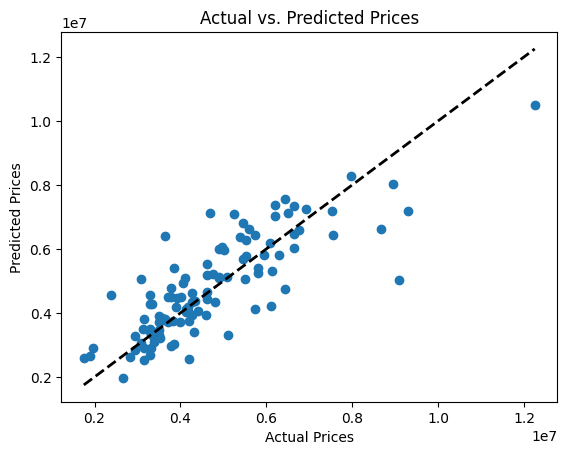

In [368]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

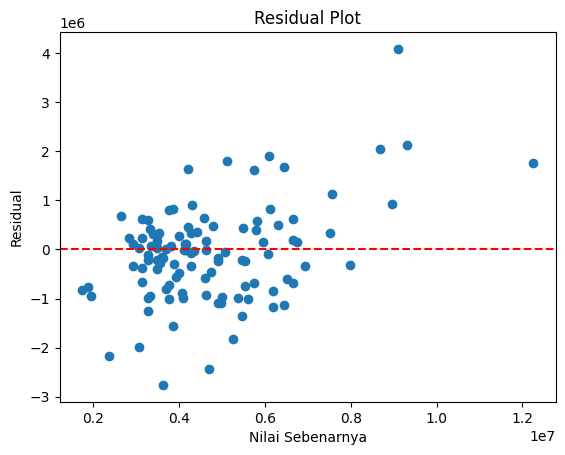

In [369]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()